In [1]:
import pandas as pd
#importiert pandas
import numpy as np
#importiert numpy
import matplotlib.pyplot as plt
#importier nur pyplot von matplotlib
from statistics import stdev
from scipy import stats
import random
import seaborn as sb
import os, os.path
%matplotlib inline

In [2]:
#constant values
DATA_DIRECTORY = '..\\Daten_niedriger_kontrast\\'

In [3]:
proband_directories = [name for name in os.listdir(DATA_DIRECTORY) if (os.path.isdir(os.path.join(DATA_DIRECTORY, name))) & ('proband' in name)]
all_proband_dataframe_dict = {}
for i in range(len(proband_directories)):
    proband_name = proband_directories[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY, proband_directories[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY, proband_directories[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY, proband_directories[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict[proband_name] = dataframe_dict

In [4]:
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        td_2 = all_proband_dataframe_dict[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict[proband][file_name] = td_2

In [5]:
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        td_2 = all_proband_dataframe_dict[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict[proband][file_name] = td_2

In [6]:
all_proband_delta_fg_bg_values_dict = {}
all_proband_mean_values_dict = {}
all_proband_stand_error_dict = {}
for proband in all_proband_dataframe_dict:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict[proband] = mean_values_dict
    all_proband_stand_error_dict[proband] = stand_error_dict

[  8.9714625  -1.6136625 -10.319365   -2.991325    5.3499     -2.351875
  13.819325    2.735075 ]
[-1.428125   -5.4497125   4.72842625  2.0057     11.54421375 -4.9923325
  6.49325     1.0333875   3.1487625 ]
[  0.20415     7.5517875 -13.631625   -4.6387      6.2991625  -1.0494875
   5.4675625   4.4186   ]
[-4.9309625  -3.322625    2.4719725   2.230825   11.52689875 -9.3746375
  6.01375    -0.3965625   7.342925  ]
[13.4771875 -0.6943375 -5.9663375  1.6733     3.0767375  5.2831
  3.86665   -8.2153375]
[ 0.32690125 -6.1531125   4.6058125  -0.5799535  13.67575    -8.294075
  2.553      -1.314675    7.89489125]
[ 7.227875   -0.2078125  -8.7850375  -6.93199875 -1.4612375   2.5613125
  5.337525    2.6156125 ]
[-3.845625  -4.7383375  3.522725  -1.6021075  7.336375  -2.9761
  1.3005     1.1636625  8.5728975]
[ 14.1349375  -1.6116    -13.401475  -13.4580125   8.0852     -5.2950625
  13.727425   11.8069875]
[ -2.3507625   -7.7496625    6.59530125   0.320525    16.10327625
 -15.62795      0.857   

In [7]:
print(stand_error)

[3.54020885 2.52355152 3.22750717 3.04932078 2.66751849 2.71384471
 4.29154267 3.02498069]


jgarzke


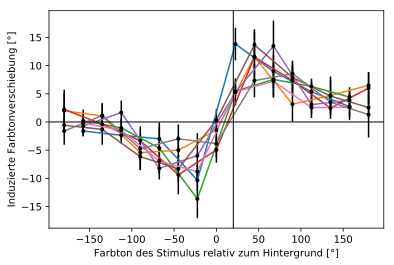

jsaumweber


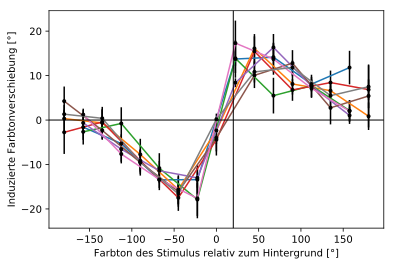

mhuber


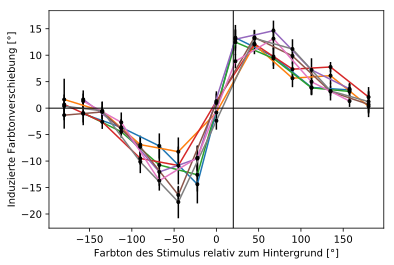

mkirschner


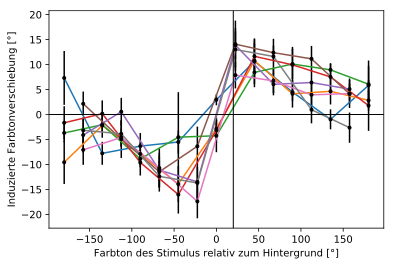

jgarzke
20180611T1344_off_off_40_lr@64_3340563314.dat


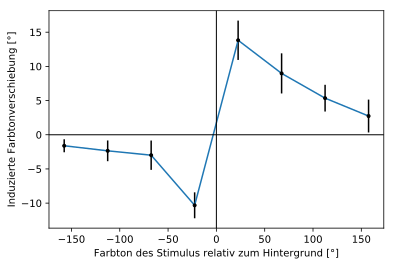

jgarzke
20180611T1354_off_on_40_lr@64_3687604975.dat


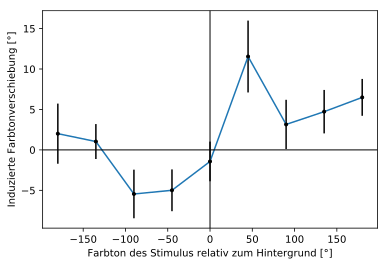

jgarzke
20180611T1408_off_off_40_lr@64_2831390410.dat


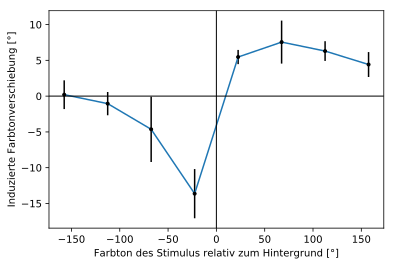

jgarzke
20180611T1613_off_on_40_lr@64_1913582969.dat


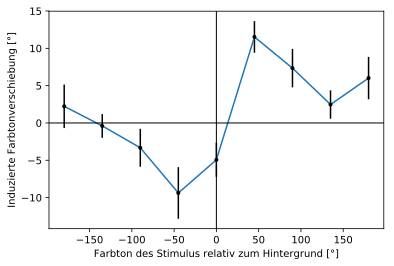

jgarzke
20180611T1623_on_off_40_lr@64_1645413394.dat


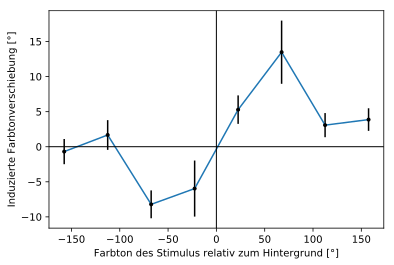

jgarzke
20180611T1631_on_on_40_lr@64_2408779048.dat


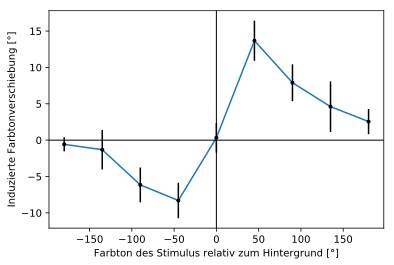

jgarzke
20180615T1321_on_off_40_lr@64_2831390410.dat


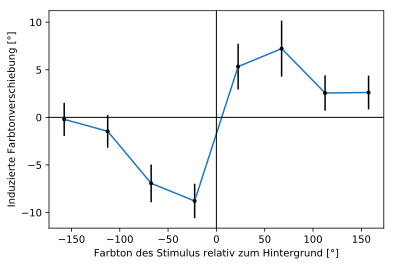

jgarzke
20180615T1331_on_on_40_lr@64_4288389797.dat


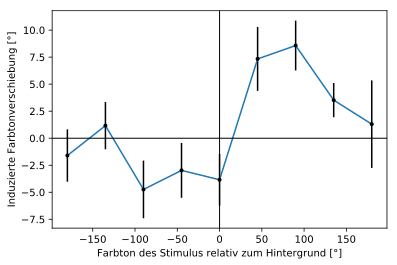

jsaumweber
20180605T1527_off_off_40_lr@64_3340563314.dat


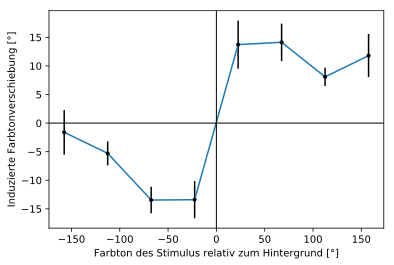

jsaumweber
20180605T1536_off_on_40_lr@64_3687604975.dat


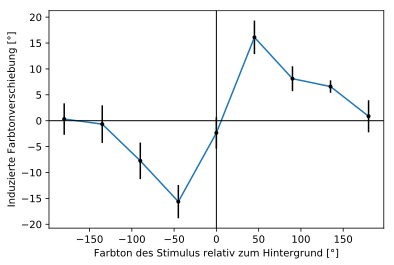

jsaumweber
20180605T1543_off_off_40_lr@64_2831390410.dat


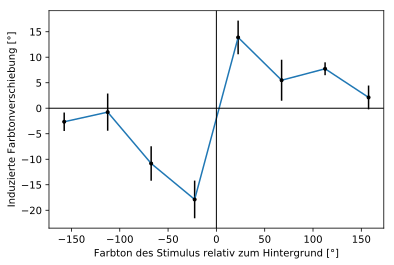

jsaumweber
20180605T1551_off_on_40_lr@64_1913582969.dat


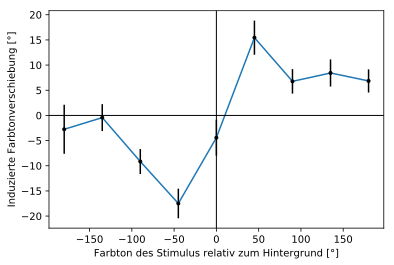

jsaumweber
20180605T1600_on_off_40_lr@64_1645413394.dat


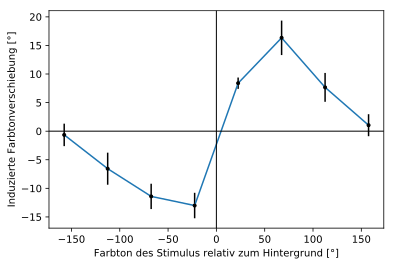

jsaumweber
20180605T1609_on_on_40_lr@64_2408779048.dat


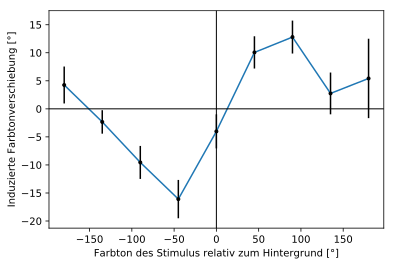

jsaumweber
20180605T1616_on_off_40_lr@64_2831390410.dat


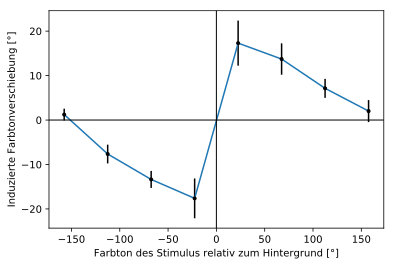

jsaumweber
20180605T1629_on_on_40_lr@64_4288389797.dat


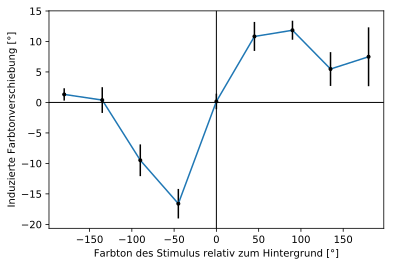

mhuber
20180529T1638_off_off_40_lr@64_3340563314.dat


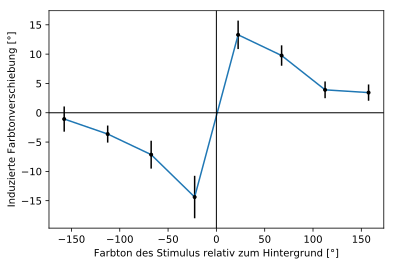

mhuber
20180530T0937_off_on_40_lr@64_3687604975.dat


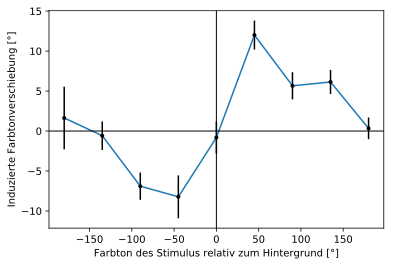

mhuber
20180530T1044_off_off_40_lr@64_2831390410.dat


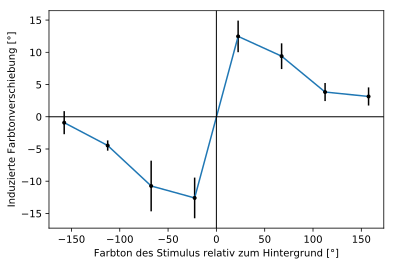

mhuber
20180530T1106_off_on_40_lr@64_1913582969.dat


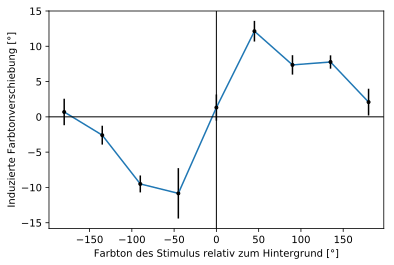

mhuber
20180605T1505_on_off_40_lr@64_1645413394.dat


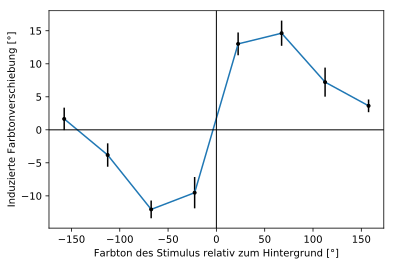

mhuber
20180615T1437_on_on_40_lr@64_2408779048.dat


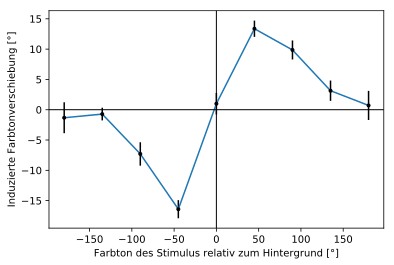

mhuber
20180615T1450_on_off_40_lr@64_2831390410.dat


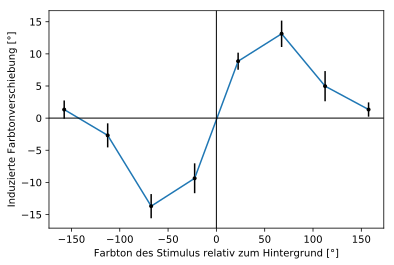

mhuber
20180615T1506_on_on_40_lr@64_4288389797.dat


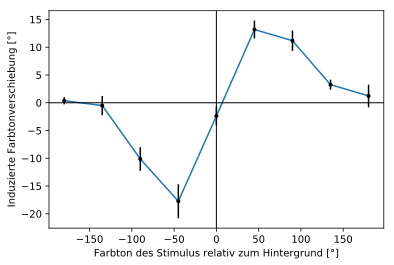

mkirschner
20180530T1554_on_on_40_lr@64_3554288751.dat


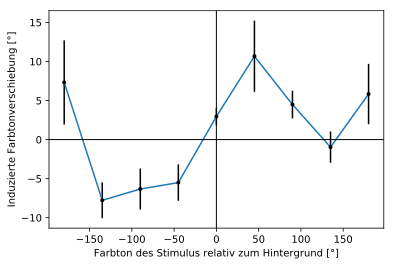

mkirschner
20180530T1605_off_on_40_lr@64_3716247761.dat


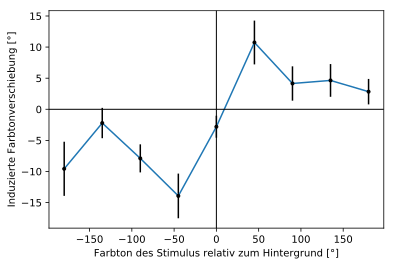

mkirschner
20180530T1617_on_on_40_lr@64_3387879649.dat


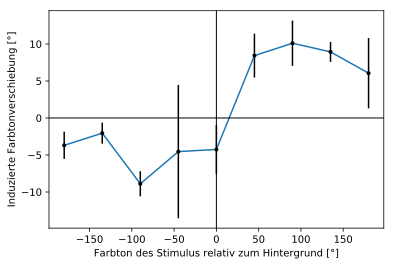

mkirschner
20180530T1628_off_on_40_lr@64_3177450072.dat


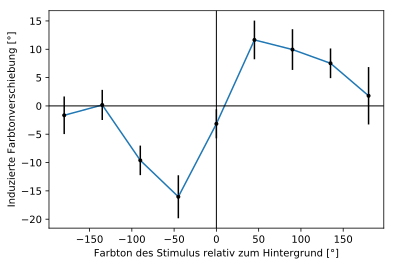

mkirschner
20180606T1540_off_off_40_lr@64_3340563314.dat


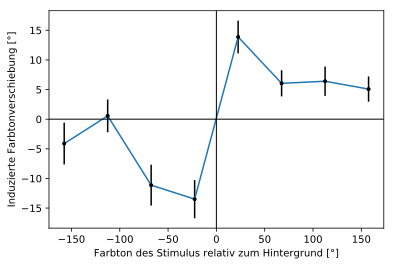

mkirschner
20180606T1551_on_off_40_lr@64_1645413394.dat


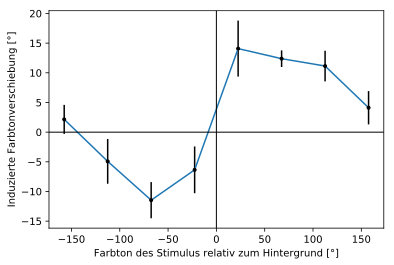

mkirschner
20180606T1606_off_off_40_lr@64_2831390410.dat


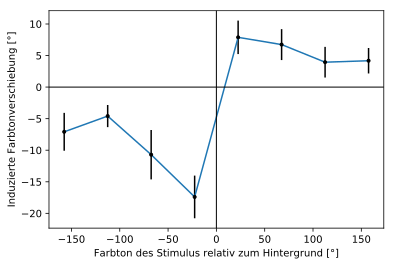

mkirschner
20180606T1617_on_off_40_lr@64_2831390410.dat


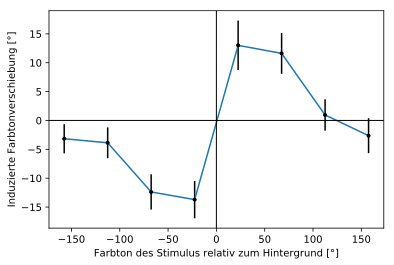

In [8]:
%config InlineBackend.figure_format = 'svg'

####### Graph mit allen Files ######
for proband in all_proband_dataframe_dict:
    print(proband)
    for file_name in all_proband_dataframe_dict[proband]:
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]

        x, y = zip(*sorted(zip(x, y)))
        _, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        
    plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
    plt.ylabel('Induzierte Farbtonverschiebung [°]')
    plt.axhline(0, color= 'black', lw=1)
    plt.axvline(20, color= 'black', lw=1)
    plt.show()

#################################

####### Graph mit Einzelfiles, dafür einfach entsprechenden Filenamen eingeben #####
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        #file = '20180417T1450_on_off_40_lr@64_3540188927.dat'
        print(proband)
        print(file_name)
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]
        
        x, y = zip(*sorted(zip(x, y)))
        x_copy, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        ##################################

        plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
        plt.ylabel('Induzierte Farbtonverschiebung [°]')
        plt.axhline(0, color= 'black', lw=1)
        plt.axvline(0, color= 'black', lw=1)
        plt.show()


In [9]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names = (list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe = pd.DataFrame(columns=column_names)

for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        all_proband_data_single_dataframe = pd.concat([all_proband_data_single_dataframe, all_proband_dataframe_dict[proband][file_name]], ignore_index=True)

In [10]:
all_proband_data_single_dataframe

,size,bg,fg,phi_start,phi,side,duration,Kreis,delta_fg_bg,delta_phi
0,40,135,292.5,280.2610,303.7240,r,6.49696,360,157.5,11.2240
1,40,315,337.5,325.9890,341.0210,r,11.43020,360,22.5,3.5210
2,40,225,67.5,109.3170,68.3011,l,10.35070,360,-157.5,0.8011
3,40,315,157.5,183.5300,153.4300,r,7.63167,360,-157.5,-4.0700
4,40,45,247.5,245.0380,244.9440,l,7.19799,360,-157.5,-2.5560
5,40,225,67.5,62.7985,62.0496,r,9.31339,360,-157.5,-5.4504
6,40,135,337.5,343.7320,338.9950,l,5.56193,360,-157.5,1.4950
7,40,225,292.5,333.2120,314.7070,r,9.18405,360,67.5,22.2070
8,40,45,157.5,140.4370,149.9050,r,9.14215,360,112.5,-7.5950
9,40,135,67.5,38.1886,64.5143,l,10.23070,360,-67.5,-2.9857


In [11]:
hue_shift_for_background_delta_fg_bg_dict = {}
hue_shift_for_background_delta_phi_mean_dict = {}
hue_shift_for_background_delta_phi_sem_dict = {}
for bg_value in all_proband_data_single_dataframe['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

jgarzke


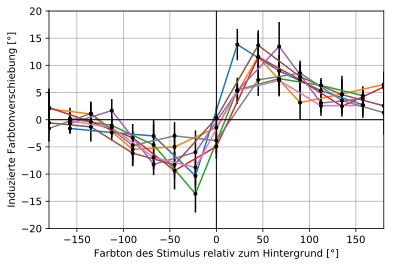

(2.4258322663688547, 2.1875082941016246, 2.666015589048403, 2.5364310750681613, 2.393855267640615, 2.9564114660676752, 2.3076261802729783, 1.5811852422369264, 4.049153707875274)
jsaumweber


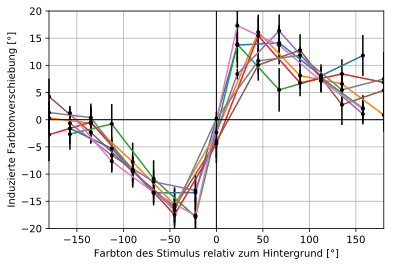

(1.0119354794484947, 2.1134008389439813, 2.602004284559857, 2.4216600883632333, 1.27802875882917, 2.380590452150588, 1.558023464172062, 2.7718893206064275, 4.825347180946335)
mhuber


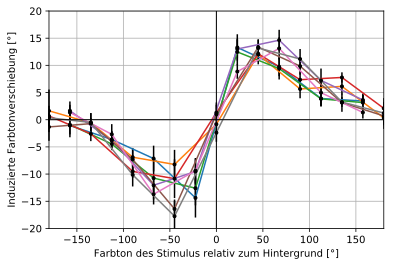

(0.6423951617968549, 1.7362843563336952, 2.1400527049532427, 3.0634414090085964, 1.6854275724545755, 1.6128638251791203, 1.83870607803999, 0.9036824421375454, 2.045145323891025)
mkirschner


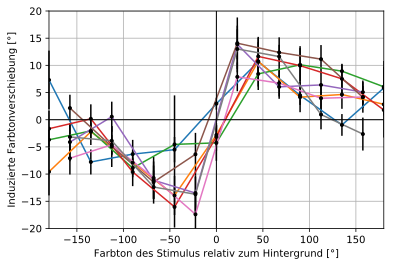

(2.523551516495406, 2.667518486881981, 3.0493207825139423, 3.227507170731077, 4.291542671782219, 3.54020885292084, 2.7138447089769104, 3.0249806940942396)
jgarzke
20180611T1344_off_off_40_lr@64_3340563314.dat


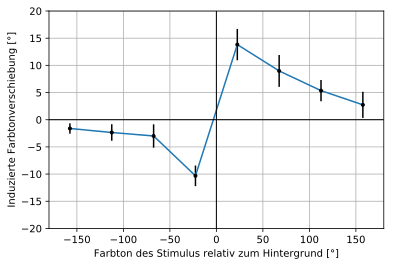

jgarzke
20180611T1354_off_on_40_lr@64_3687604975.dat


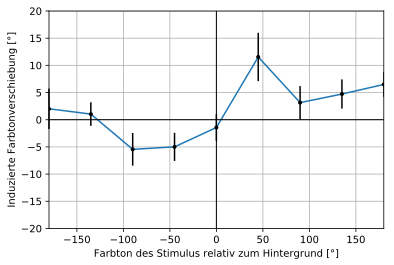

jgarzke
20180611T1408_off_off_40_lr@64_2831390410.dat


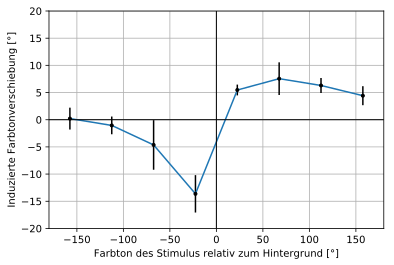

jgarzke
20180611T1613_off_on_40_lr@64_1913582969.dat


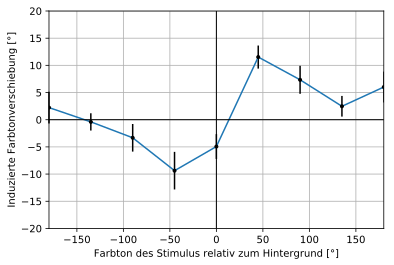

jgarzke
20180611T1623_on_off_40_lr@64_1645413394.dat


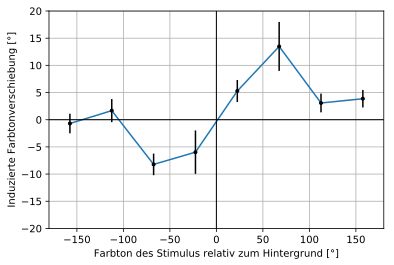

jgarzke
20180611T1631_on_on_40_lr@64_2408779048.dat


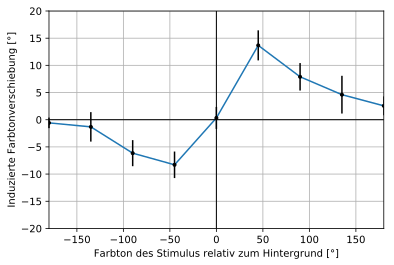

jgarzke
20180615T1321_on_off_40_lr@64_2831390410.dat


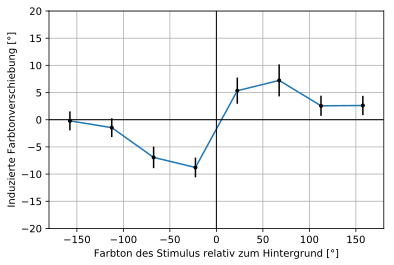

jgarzke
20180615T1331_on_on_40_lr@64_4288389797.dat


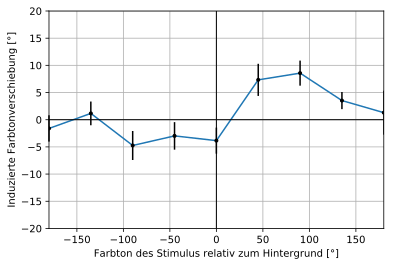

jsaumweber
20180605T1527_off_off_40_lr@64_3340563314.dat


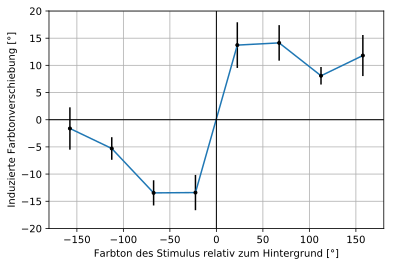

jsaumweber
20180605T1536_off_on_40_lr@64_3687604975.dat


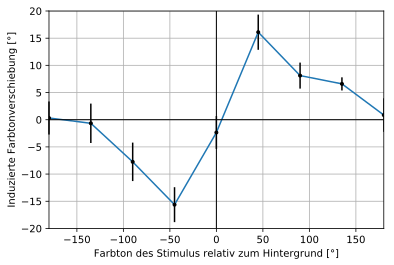

jsaumweber
20180605T1543_off_off_40_lr@64_2831390410.dat


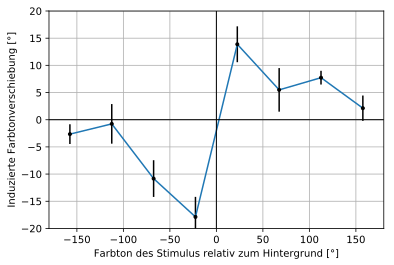

jsaumweber
20180605T1551_off_on_40_lr@64_1913582969.dat


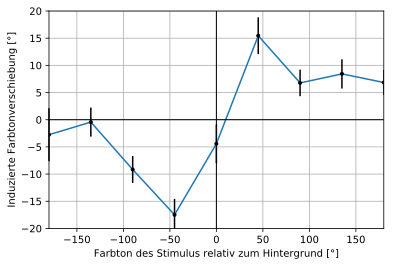

jsaumweber
20180605T1600_on_off_40_lr@64_1645413394.dat


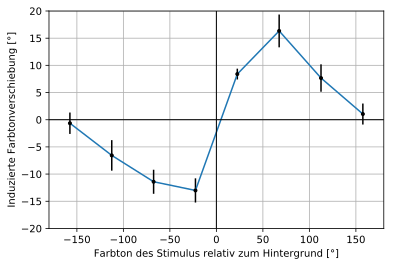

jsaumweber
20180605T1609_on_on_40_lr@64_2408779048.dat


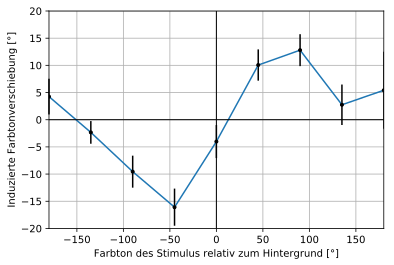

jsaumweber
20180605T1616_on_off_40_lr@64_2831390410.dat


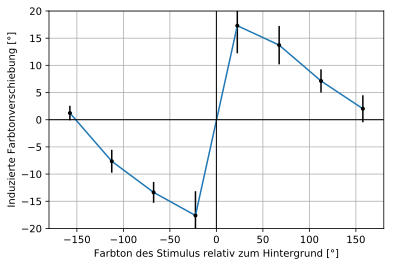

jsaumweber
20180605T1629_on_on_40_lr@64_4288389797.dat


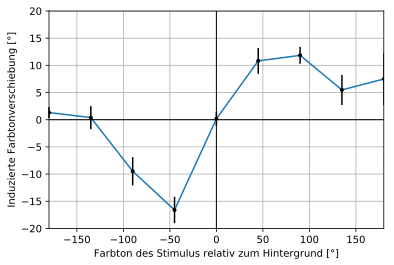

mhuber
20180529T1638_off_off_40_lr@64_3340563314.dat


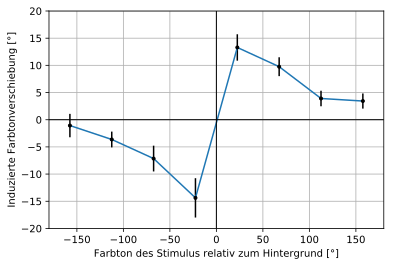

mhuber
20180530T0937_off_on_40_lr@64_3687604975.dat


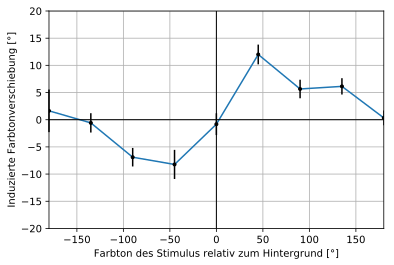

mhuber
20180530T1044_off_off_40_lr@64_2831390410.dat


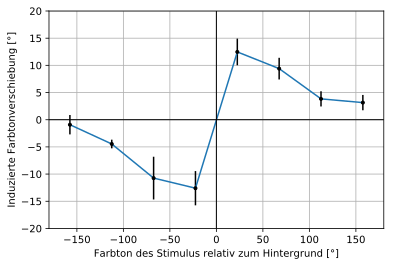

mhuber
20180530T1106_off_on_40_lr@64_1913582969.dat


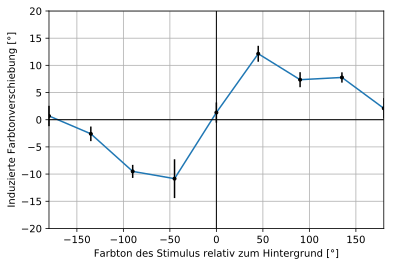

mhuber
20180605T1505_on_off_40_lr@64_1645413394.dat


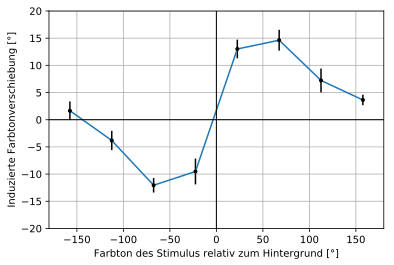

mhuber
20180615T1437_on_on_40_lr@64_2408779048.dat


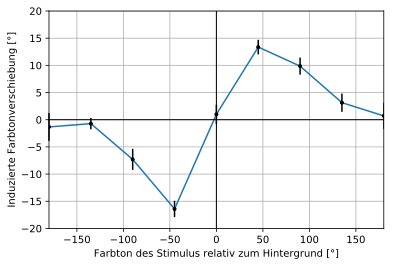

mhuber
20180615T1450_on_off_40_lr@64_2831390410.dat


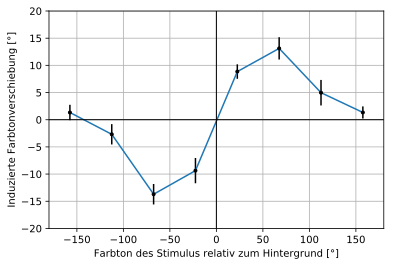

mhuber
20180615T1506_on_on_40_lr@64_4288389797.dat


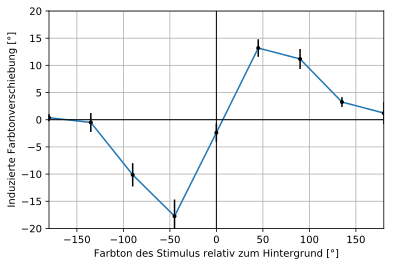

mkirschner
20180530T1554_on_on_40_lr@64_3554288751.dat


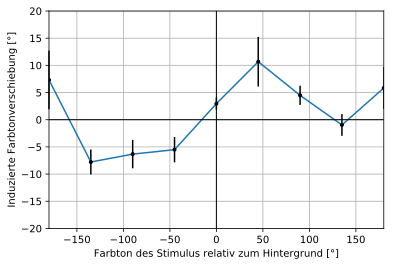

mkirschner
20180530T1605_off_on_40_lr@64_3716247761.dat


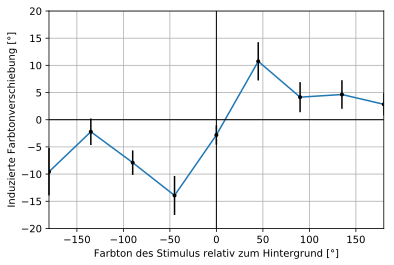

mkirschner
20180530T1617_on_on_40_lr@64_3387879649.dat


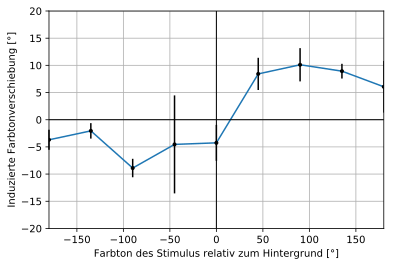

mkirschner
20180530T1628_off_on_40_lr@64_3177450072.dat


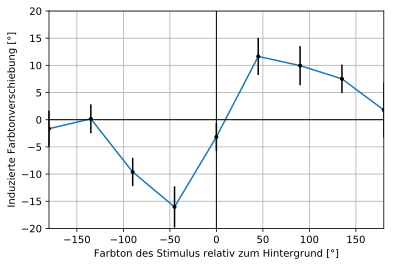

mkirschner
20180606T1540_off_off_40_lr@64_3340563314.dat


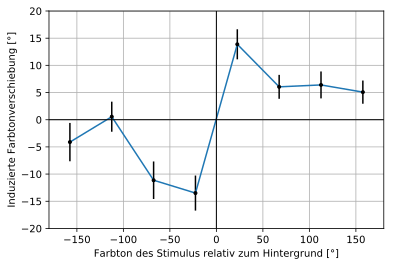

mkirschner
20180606T1551_on_off_40_lr@64_1645413394.dat


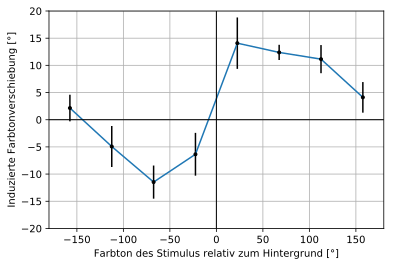

mkirschner
20180606T1606_off_off_40_lr@64_2831390410.dat


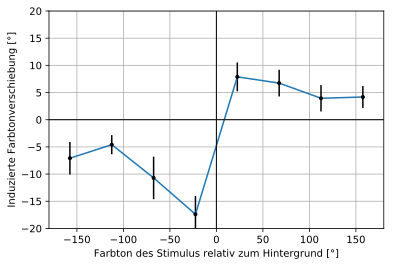

mkirschner
20180606T1617_on_off_40_lr@64_2831390410.dat


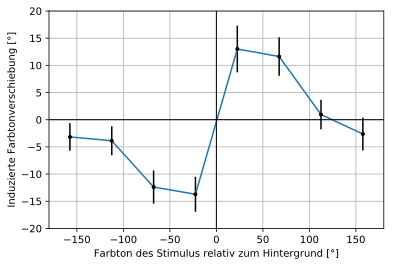

In [12]:
%config InlineBackend.figure_format = 'svg'

####### Graph mit allen Files ######
for proband in all_proband_dataframe_dict:
    print(proband)
    for file_name in all_proband_dataframe_dict[proband]:
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]

        x, y = zip(*sorted(zip(x, y)))
        _, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        
    plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
    plt.ylabel('Induzierte Farbtonverschiebung [°]')
    plt.axhline(0, color= 'black', lw=1)
    plt.axvline(0, color= 'black', lw=1)
    plt.axis([-180, 180, -20, 20])
    plt.grid(True)
    plt.show()
    print(sem)
    
#################################

####### Graph mit Einzelfiles, dafür einfach entsprechenden Filenamen eingeben #####
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        #file = '20180417T1450_on_off_40_lr@64_3540188927.dat'
        print(proband)
        print(file_name)
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]
        
        x, y = zip(*sorted(zip(x, y)))
        x_copy, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        ##################################

        plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
        plt.ylabel('Induzierte Farbtonverschiebung [°]')
        plt.axhline(0, color= 'black', lw=1)
        plt.axvline(0, color= 'black', lw=1)
        plt.axis([-180, 180, -20, 20])
        plt.grid(True)
        plt.show()

In [13]:
for proband in all_proband_dataframe_dict:
    print(proband)
    average_time = (sum(td_2['duration']) / 64)
    print(average_time)

jgarzke
9.854491875
jsaumweber
9.854491875
mhuber
9.854491875
mkirschner
9.854491875
